In [1]:
from PIL import Image
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import pickle
import sat_utils as utils
import tifffile as tiff

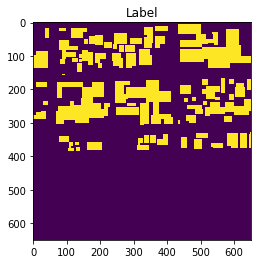

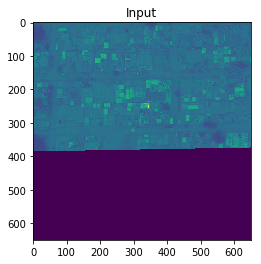

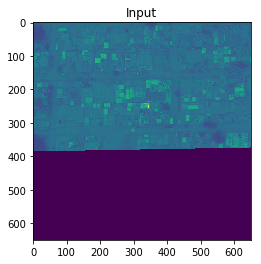

In [2]:
target = utils.load_map_tiff('MUL-PanSharpen_AOI_5_Khartoum_img16_target.tif')
input = utils.load_map_tiff('MUL-PanSharpen_AOI_5_Khartoum_img16_input.tif')

input2 = tiff.imread('MUL-PanSharpen_AOI_5_Khartoum_img16_input.tif').astype(np.float32)


plt.imshow(target[0,:,:])
plt.title('Label');
plt.show()

plt.imshow(input[4,:,:])
plt.title('Input');
plt.show()


plt.imshow(input2[:,:,4])
plt.title('Input');
plt.show()

In [3]:
target_b = target.astype(np.bool)
target_b[:,:,0]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [4]:
target_b[:,:,0] ^ target_b[:,:,1]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [5]:
def minmax(image):
    """Min-max normalisation."""
    out = np.zeros_like(image).astype(np.float32)
    if image.sum() == 0:
        return image  # bands  # Probably wrong - error in supplied file.

    for jj in range(image.shape[2]):
        cc = image[:, :, jj].min()
        dd = image[:, :, jj].max()

        tt = (image[:, :, jj] - cc) / (dd - cc)
        out[:, :, jj] = tt
    return out.astype(np.float32)

#### Crop and Display

Original: (3, 650, 650)
Cropped: (3, 76, 76)
Max target: 255.0
Min target: 0.0


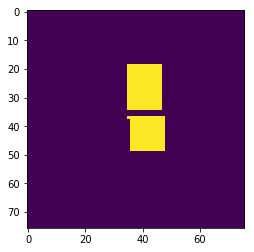

Original: (8, 650, 650)
Cropped: (3, 650, 650)
MovedAxis: (650, 650, 3)


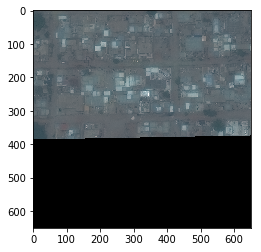

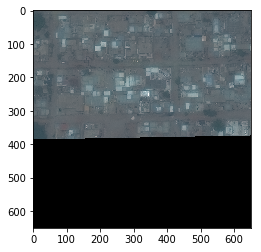

In [6]:
crop_target = utils.crop_img(target,0,0,76,76)
print('Original:',target.shape)
print('Cropped:',crop_target.shape)
print('Max target:', np.max(target))
print('Min target:', np.min(target))
plt.imshow(crop_target[0,:,:])
plt.show()

#crop_input = utils.crop_img(input,0,0,76,76)
crop_input = utils.get_rgb(input)
rgb = np.dstack((input2[:, :, 4], input2[:, :, 2], input2[:, :, 1]))
rgb_norm = minmax(rgb)
rgb_norm2 = utils.img_minmax_norm(rgb)



print('Original:',input.shape)
print('Cropped:',crop_input.shape)
crop_input = np.moveaxis(crop_input, 0, 2)
print('MovedAxis:',crop_input.shape)
#rgb_norm = utils.img_minmax_norm(crop_input[:,:,0:3])
plt.imshow( rgb_norm )
plt.show()
plt.imshow( rgb_norm2 )

plt.show()

In [ ]:
dict_input, dict_output = utils.crop_blocks(input, target, display=True, earlyStop=39)

### Save images to Pickle

In [ ]:
with open('input.pickle', 'wb') as handle:
    pickle.dump(dict_input, handle)

with open('label.pickle', 'wb') as handle:
    pickle.dump(dict_output, handle)
    

In [ ]:
plt.imshow(dict_output[29][0,:,:])

In [ ]:
num = 28
plt.imshow(dict_output[num][0,:,:])
plt.show()
plt.imshow(dict_output[num][0,:,:].astype(np.bool) ^ dict_output[num][1,:,:].astype(np.bool))
plt.show()